    gender  height
hf                
0        0   161.2
0        0   167.5
0        0   159.5
0        0   157.0
0        0   155.8
..     ...     ...
0        0   176.5
0        0   164.4
0        0   160.7
0        0   174.0
0        0   163.8

[260 rows x 2 columns]


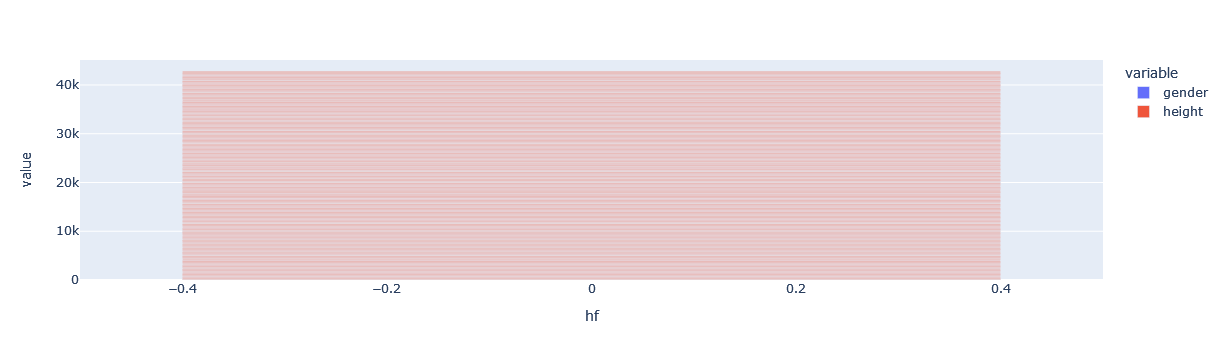

In [2]:
# install ipywidgets

# colonne:pos: description
# "dia_Bia";(1,4);Biacromial diameter
# "dia_Bii";(6,9);Biiliac diameter
# "dia_Bit";(11,14);Bitrochanteric diameter
# "ches_dep_spi_ster";(16,19);Chest depth between spine and sternum at nipple level
# "ches_dia_nip_exp";(21,24);Chest diameter at nipple level, mid expiration
# "dia_elb";(26,29);Elbow diameter, sum of two elbows
# "dia_wri";(31,34);Wrist diameter, sum of two wrists
# "dia_knee";(36,39);Knee diameter, sum of two knees
# "dia_ank";(41,44);Ankle diameter, sum of two ankles
# "sho_delt_mus";(46,50);Shoulder girth over deltoid muscles
# "ches_gir";(52,56);Chest girth, nipple line in males and just above breast tissue in females, midexpiration
# "wai_gir";(58,62);Waist girth, narrowest part of torso below the rib cage, average of contracted and relaxed position
# "nav_gir";(64,68);Navel girth at umbilicus and iliac crest,iliac crest as a landmark
# "hip_gir";(70,74);Hip girth at level of bitrochanteric diameter
# "thi_gir";(76,79);Thigh girth below gluteal fold, average of right and left girths
# "bic_gir";(81,84);Bicep girth, flexed, average of right and left girths
# "for_gir";(86,89);Forearm girth, extended, palm up, average of right and left girths
# "kne_gir";(91,94);Knee girth over patella, slightly flexed position, average of right and left girths
# "cal_max_gir";(96,99);Calf maximum girth, average of right and left girths
# "ank_min_gir";(101,104);Ankle minimum girth, average of right and left girths
# "wri_min_gir";(106,109);Wrist minimum girth, average of right and left girths
# "age";(111,114);Age (years)
# "weight";(116,120);Weight (kg)
# "height";(122,126);Height (cm)
# "gender";(128,128);Gender (1 male, 0 female)

import pandas
import plotly.express as px

colonne_name = [
'dia_Bia',
'dia_Bii',
'dia_Bit',
'ches_dep_spi_ster',
'ches_dia_nip_exp',
'dia_elb',
'dia_wri',
'dia_knee',
'dia_ank',
'sho_delt_mus',
'ches_gir',
'wai_gir',
'nav_gir',
'hip_gir',
'thi_gir',
'bic_gir',
'for_gir',
'kne_gir',
'cal_max_gir',
'ank_min_gir',
'wri_min_gir',
'age',
'weight',
'height',
'gender']

def read_healt_data()->pandas.DataFrame:
    try:
        return pandas.read_csv("../data/body_data.csv",sep=";",header=None,names=colonne_name)
        print(r_data)
    except OSError as err:
        print("OS error:", err)

dt_all_data =read_healt_data()
dt_all_data.index = pandas.Index(dt_all_data['gender'],name='hf')

val = dt_all_data['gender'].value_counts()
l_val= val.tolist()
proportion_homme_femme = [{"gender":"homme","valeur":l_val[0]}, {"gender":"femme","valeur":l_val[1]}]
dt_hf = pandas.DataFrame(proportion_homme_femme)

que_les_femmes=dt_all_data[dt_all_data["gender"]==0]
# les_femmes_dans_lordre=que_les_femmes.sort_values(by="height")
# fig = px.bar(les_femmes_dans_lordre["height"],y='height',title=" ex4 : Un histogramme des femmes dans l’échantillon")
# fig.show
que_les_femmes = que_les_femmes[["gender","height"]].groupby("height").count()
print(que_les_femmes)
# que_les_femmes = que_les_femmes.sort_values(by="height")
fig = px.bar(que_les_femmes,x="gender",y="height")
# fig.update_xaxes(type='category')
fig.show()
